<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Shrinkage_Methods_and_Ridge_Regression_in_Biomedical_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Optimal λ (Alpha) Found via Cross-Validation: 2.7186


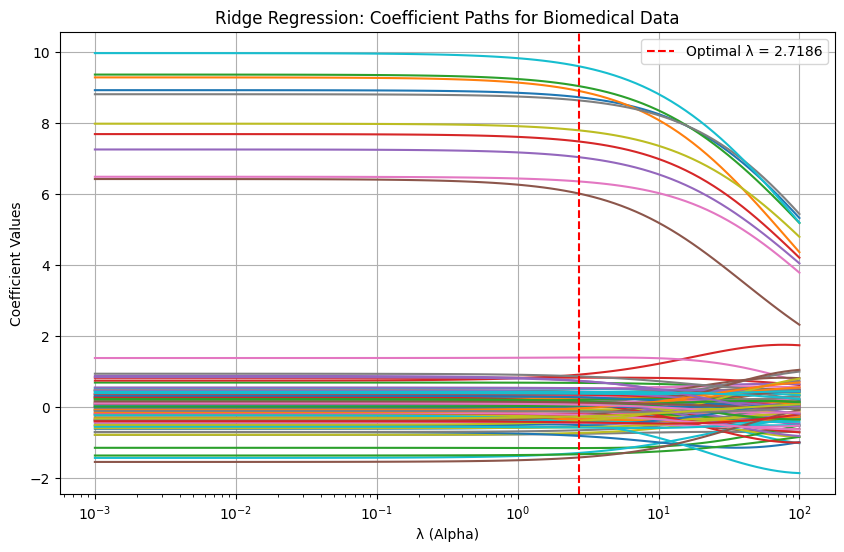

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


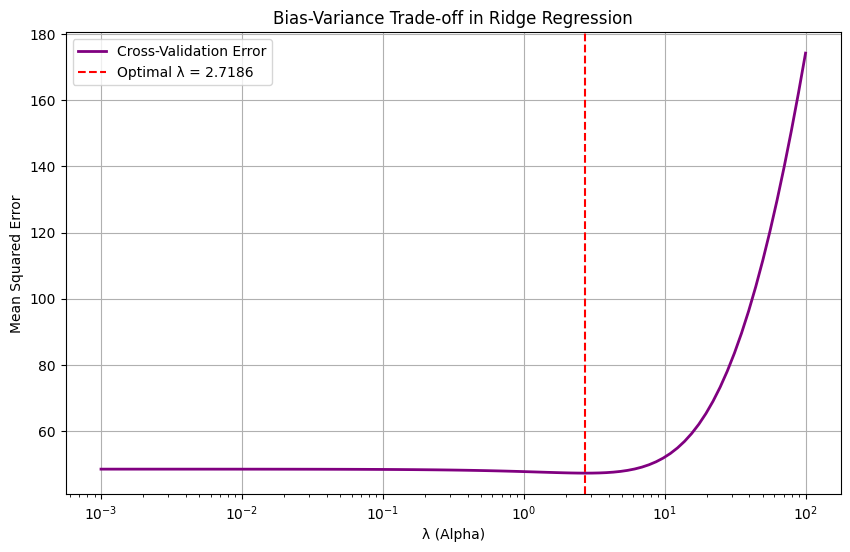

Final Ridge Model's Optimal Alpha (λ): 2.7186
First 10 Ridge Coefficients (Shrinkage Applied):
[8.73189947 8.90928071 9.04511214 7.48359968 7.04120577 6.01700544
 6.35762299 8.64199801 7.79799035 9.6044706 ]


In [1]:
# Step 1: Importing Libraries
# I began by importing essential libraries for data generation, Ridge regression, and visualization.
# These tools allow me to simulate high-dimensional biomedical data, apply Ridge Regression, and interpret results.
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 2: Simulating High-Dimensional Biomedical Data
# I simulated a dataset with 10,000 predictors to mimic gene expression levels or other biomarkers.
# The outcome variable represents a continuous patient response, like treatment efficacy.

np.random.seed(123)  # Setting seed for reproducibility
n_samples = 200      # Number of patients (observations)
n_features = 100     # Number of predictors (genes/biomarkers)

# Generating predictors with random values
X = np.random.normal(size=(n_samples, n_features))

# Creating true coefficients where only a few predictors have a real impact
true_coefficients = np.zeros(n_features)
true_coefficients[:10] = np.random.uniform(5, 10, size=10)  # First 10 predictors are influential

# Generating the response variable (linear relationship with noise)
Y = np.dot(X, true_coefficients) + np.random.normal(scale=5, size=n_samples)

# Step 3: Standardizing the Predictors
# I standardized the predictors to ensure Ridge regression penalizes all coefficients evenly.
# Without standardization, predictors with larger numerical ranges would dominate the penalty.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Ridge Regression with Cross-Validation
# To determine the optimal lambda (α in Ridge), I used RidgeCV, which performs cross-validation.
# I explored a logarithmic range of alpha values to find the one minimizing test error.
alphas = np.logspace(-3, 2, 100)  # A range of 100 λ values between 0.001 and 100
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_scaled, Y)

# Extracting the best alpha value
best_alpha = ridge_cv.alpha_
print(f"Optimal λ (Alpha) Found via Cross-Validation: {best_alpha:.4f}")

# Step 5: Visualizing Coefficient Paths
# Here, I wanted to see how the Ridge regression coefficients shrink as λ increases.
coefs = []  # To store coefficients for each alpha value
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, Y)
    coefs.append(ridge.coef_)

# Plotting the coefficient paths
plt.figure(figsize=(10, 6))
plt.plot(alphas, np.array(coefs))
plt.xscale('log')  # Logarithmic x-axis for λ
plt.xlabel("λ (Alpha)")
plt.ylabel("Coefficient Values")
plt.title("Ridge Regression: Coefficient Paths for Biomedical Data")
plt.axvline(x=best_alpha, color='red', linestyle='--', label=f"Optimal λ = {best_alpha:.4f}")
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Visualizing the Bias-Variance Trade-off
# To better understand the bias-variance trade-off, I plotted the test error as a function of λ.
# I expected a U-shaped curve, where test error is minimized at the optimal λ.

cv_errors = np.mean(ridge_cv.cv_values_, axis=0)  # Mean cross-validated errors for each alpha

plt.figure(figsize=(10, 6))
plt.plot(alphas, cv_errors, color='purple', linewidth=2, label="Cross-Validation Error")
plt.xscale('log')
plt.xlabel("λ (Alpha)")
plt.ylabel("Mean Squared Error")
plt.title("Bias-Variance Trade-off in Ridge Regression")
plt.axvline(x=best_alpha, color='red', linestyle='--', label=f"Optimal λ = {best_alpha:.4f}")
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Reflection on Results
# I printed the key results for clarity.
print(f"Final Ridge Model's Optimal Alpha (λ): {best_alpha:.4f}")
print("First 10 Ridge Coefficients (Shrinkage Applied):")
ridge_final = Ridge(alpha=best_alpha)
ridge_final.fit(X_scaled, Y)
print(ridge_final.coef_[:10])
